<a href="https://colab.research.google.com/github/Jangchanhi/pyAICE/blob/master/Python%ED%99%9C%EC%9A%A9AI%EB%AA%A8%EB%8D%B8%EB%A7%81_01_%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%80%B4%EC%A6%88_easy_v3_20220219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습-퀴즈] Python 활용한 AI 모델링 - 전처리 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 전처리에 대해 실습해 보겠습니다.
+ 머신러닝과 AI 모델링 전체에서 60~70% 차지하는 부분이 바로 전처리 파트입니다.
+ 굉장히 시간과 노력이 많이 투입되며, 어려운 부분일수 있습니다.
+ 데이터가 깨끗이 정리되지 않는다면 머신러닝/AI 성능을 장담할수 없으므로 데이터 전처리에 심혈을 기울려 주시기 바랍니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
0. 실습 내용 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : 데이터 분석?
3. 데이터 전처리 수행
 - 불필요 컬럼 삭제
 - 컬럼 내용 변경하기
 - Null 처리
 - 컬럼 type 변경하기
4. 시각화
5. 결과 저장하기

##  
# 0. 실습 내용 확인

## <font color=blue> **머신러닝, 딥러닝을 사용한 통신 서비스 이탈 예측** </font>
### 모든 관련 고객 데이터를 분석하고 강력하고 정확한 이탈 예측 모델을 개발하여 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 수립합니다.
### Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미합니다. 모든 조직이 기존 고객을 유지하고 새로운 고객을 유치하는 것이 매우 중요합니다. 그 중 하나가 실패하면 비즈니스에 좋지 않습니다. 목표는 업계에서 경쟁 우위를 유지하기 위해 이탈 예측을 위한 머신러닝, 딥러닝의 가능성을 탐색하는 것입니다.

#  
# 1. 필요 라이브러리 임포트 및 파일 읽어오기

### Numpy

##### <font color=blue> **[문제] numpy 라이브러리를 np alias로 임포트하세요.** </font>

In [3]:
import numpy as np
import pandas as pd

####  
### Pandas

##### <font color=blue> **[문제] pandas 라이브러리를 pd alias로 임포트하세요.** </font>

####  
### <font color=green>읽어올 데이터 파일 : data_v1.csv</font>

#### Telco Customer Churn Dataset  컬럼
1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

####  
### CSV 파일 데이터 읽어오기

##### <font color=blue> **[문제] data.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [4]:
# 읽어 들일 파일명 : data_v1.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장
df = pd.read_csv('data_v1.csv')


In [5]:
# 읽어온 데이터프레임 확인하기
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG     NaN            0.0     Yes         No       1   
1     5575-GNVDE    Male            0.0      No         No      34   
2     3668-QPYBK    Male            0.0      No         No       2   
3     7795-CFOCW    Male            0.0      No         No      45   
4     9237-HQITU  Female            0.0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male            0.0     Yes        Yes      24   
7039  2234-XADUH  Female            0.0     Yes        Yes      72   
7040  4801-JZAZL  Female            0.0     Yes        Yes      11   
7041  8361-LTMKD    Male            1.0     Yes         No       4   
7042  3186-AJIEK     NaN            0.0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

#  
# 2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석

### 데이터 탐색하기

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,NaN,0.0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


####  
### 자료구조 파악

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  
### 데이터 타입, 인덱스, 컬럼명, Values 확인

In [13]:
# 인덱스
df.index

RangeIndex(start=0, stop=7043, step=1)

In [14]:
# 컬럼명
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Values
df.values

array([['7590-VHVEG', nan, 0.0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0.0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0.0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0.0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1.0, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', nan, 0.0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

####  
### Null 데이터 확인

In [24]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

####  
### 통계 정보

In [25]:
# SeniorCitizen 컬럼 : 고령자 여부, 범주형 0,1
# tenure : 서비스 사용한 월수로 평균 32개월 사용, 최대 72개월 충성고객 있음 확인
#           25%, 50%, 75% 비율과 Max를 보니, 아무래도 Outliner 있는것으로 사료됨.
# MonthlyCharges : 월사용요금, 평균 64$ , 최소 18$, 최대 118$
# 숫자형 데이터만 나온는 듯?
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#  
# 3. 데이터 전처리 수행

####  
### 자료구조 파악

##### <font color=blue> **[문제] df DataFrame의 함수를 활용해서 자료구조(Row, columnm , Not-null, type)을 파악 하세요.** </font>

In [26]:
# DataFrame info 함수 

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  
### 컬럼 삭제

##### <font color=blue> **[문제] df 데이터프레임에서 'customerID' 컬럼 삭제 하세요.** </font>

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
# DataFrame drop 함수 
# 'customerID' 컬럼 삭제
# axis=1 옵션 사용해서 컬럼단위 삭제 수행
# inplace=True 옵션 사용하여 df DataFrame에 저장

df = df.drop('customerID',axis=1)
# df.drop('customerID', axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

In [35]:
# 21컬럼에서 20개 컬럼으로 1개 줄어듬 확인
# TotalCharges 컬럼은 사용요금으로 숫자형이어야 하는데 Ojbect로 나옴. 확인 필요

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


####  
### 컬럼 내용 변경하기 

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환하로록 하자.<br>
null, _ 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경하거나 필요없을 경우 삭제하도록 하자.

#### TotalCharges 컬럼 타입 변경하기

In [40]:
# TotalCharges : 월사용요금, 실수형으로 보인다.
# df['TotalCharges']
# 나온 형태가 시리즈가 된다. => 한개의 컬럼만 가지고 있는 것
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [41]:
# TotalCharges 컬럼 타입을 float로 변경해 보자.
# 문자열을 숫자형으로 변경할수 없으므로 에러 발생

df['TotalCharges'].astype(float) # 실수형 데이터로 바꿀 수 X

ValueError: could not convert string to float: ''

In [ ]:
# Boolean indexing으로 검색
(df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [47]:
((df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')).sum()

11

In [43]:
df['TotalCharges'] == ' ' # 불린 인덱스

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [44]:
# Boolean indexing으로 검색

cond = (df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')
df[cond] # True 인 것만 출력이 된다.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0.0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0.0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0.0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0.0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0.0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0.0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0.0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


####  
##### <font color=blue> **[문제] df 데이터프레임의 'TotalCharges' 컬럼의 값 ' ' --> '0' 변경하세요.** </font>

In [50]:
# DataFrame replace 함수 
# 대상 컬럼 : 'TotalCharges'  

df['TotalCharges'].replace(' ', '0', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


####  
##### <font color=blue> **[문제] df 데이터프레임의 'TotalCharges' 컬럼 타입을 object에서 float 변경하세요.** </font>

In [52]:
# 'TotalCharges' 컬럼 type을 float로 변경
# 결과를 TotalCharges 컬럼에 다시 넣어야 합니다.

df['TotalCharges'] = df['TotalCharges'].astype(float)
# 아까는 공백이 있었지만 이제 0으로 바꿔서 값이 나온다.


In [53]:
# 다시 Boolean indexing으로 검색 : '' 값을 가진 Row 없음

cond = (df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')
df[cond]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [54]:
# TotalCharges 컬럼 float 변경 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


#### Churn 컬럼의 문자열값을 숫자로 변경

In [55]:
# Churn 컬럼의 분포 확인 
# Churn Yes : 이탈 , No : 이탈안함. 언밸런스하게 No쪽이 많은 차지하고 있음

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [57]:
# 'Churn' 컬럼의 ['Yes', 'No'] --> [1, 0] 변경하기
# 컴퓨터는 문자열 이해 잘 하지 못해 숫자로 변경해야 함.

df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [56]:
# Churn 컬럼의 분포 확인 
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

####  
### Null 데이터 확인

##### <font color=blue> **[문제] df 데이터프레임에 대해 컬럼별로 null 얼마나 있는지 null 갯수를 나열 하세요.** </font>

In [59]:
# DataFrame isnull(), sum() 함수 활용

df.isnull().sum()

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

####  
### 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

####  
##### <font color=blue> **[문제] df 데이터프레임의 결측치 많은 컬럼은 컬럼 제거하고 나머지 결측치는 Row 제거 하세요.** </font>

In [62]:
# 1. 결측치 많은 컬럼 :  DeviceProtection   --> drop 함수 이용하여 해당 컬럼 제거
# 2. 결측치 작은 Row에 대해서 dropna로 제거 
# inplace=True 옵션으로 자체 저장

# df.drop('DeviceProtection',axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

In [63]:
# Null 여부 다시 확인
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
# DeviceProtection 컬럼 삭제 확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 1 to 7041
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   SeniorCitizen     7027 non-null   float64
 2   Partner           7027 non-null   object 
 3   Dependents        7027 non-null   object 
 4   tenure            7027 non-null   int64  
 5   PhoneService      7027 non-null   object 
 6   MultipleLines     7027 non-null   object 
 7   InternetService   7027 non-null   object 
 8   OnlineSecurity    7027 non-null   object 
 9   OnlineBackup      7027 non-null   object 
 10  TechSupport       7027 non-null   object 
 11  StreamingTV       7027 non-null   object 
 12  StreamingMovies   7027 non-null   object 
 13  Contract          7027 non-null   object 
 14  PaperlessBilling  7027 non-null   object 
 15  PaymentMethod     7027 non-null   object 
 16  MonthlyCharges    7027 non-null   float64


#  
# 4. 시각화

### 라이브러리 임포트

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

####  
### Bar 차트

In [66]:
df['gender'].value_counts()

Male      3550
Female    3477
Name: gender, dtype: int64

In [67]:
type(df['gender'].value_counts())

pandas.core.series.Series

<Axes: >

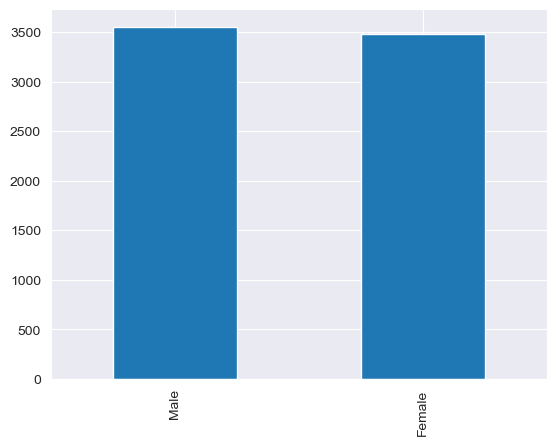

In [68]:
df['gender'].value_counts().plot(kind='bar')

##### <font color=blue> **[문제] df 데이터프레임의 'Partner' 컬럼의 값 분포를 구하고 Bar 차트를 그리세요.** </font>

<Axes: >

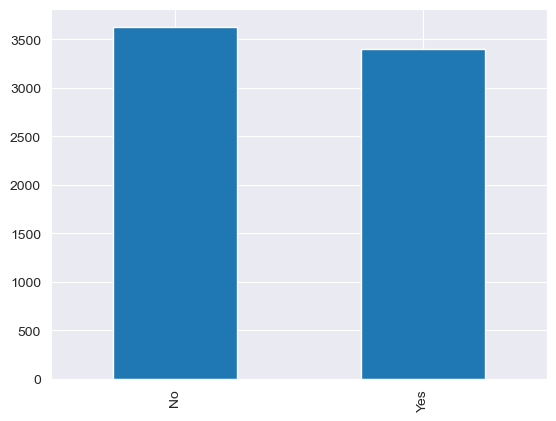

In [72]:
# DataFrame value_counts()와 plot() 함수 활용
# 대상 컬럼 : 'Partner'  
# plot 함수의 인자 : kind='bar'

df['Partner'].value_counts().plot(kind='bar')
# type(df['Partner'].value_counts())

####  
### 한꺼번에 Object 컬럼에 대해서 분포 Bar 차트 확인해 봅시다.

In [75]:
# Object 컬럼만 뽑으려면 
# 1. 일일히 눈으로 보고 Object 컬럼 고른다
# 2. select_dtypes() 함수 활용한다.

df.select_dtypes('0').head(3)

TypeError: data type '' not understood

In [78]:
# Object 컬럼명만 뽑아보자
df.select_dtypes('O').columns.values

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], dtype=object)

NameError: name 'plt' is not defined

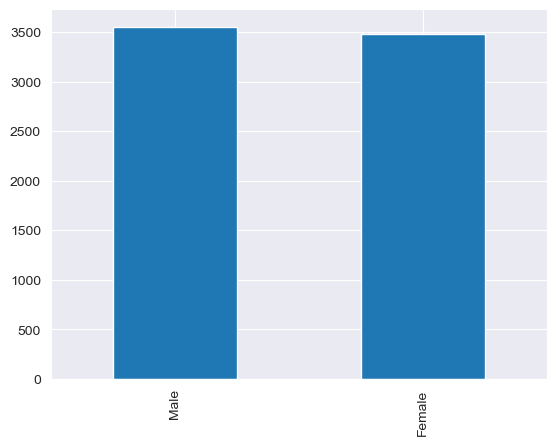

In [81]:
# Object 컬럼 하나씩 가져와서 Bar 차트 그려보기
# 불균형 컬럼 : Dependents, PhoneService. 심한 불균형 가진 PhoneService 컬럼 삭제 필요  

object_list = df.select_dtypes('object').columns.values

for col in object_list:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

#### 불균형 심한 PhoneService 컬럼 삭제

In [82]:
df.drop('PhoneService', axis=1, inplace=True)

####  
### 숫자형 컬럼에 대한 시각화

In [ ]:
# number(int, float) 컬럼에 대해 검색
df.select_dtypes( 'number').head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
1,0.0,34,56.95,1889.50,0
2,0.0,2,53.85,108.15,1
3,0.0,45,42.30,1840.75,0


#### Churn 컬럼

In [ ]:
# Churn 컬럼은 0, 1 되어 있으므로 분포 확인
df['Churn'].value_counts()

0    5161
1    1866
Name: Churn, dtype: int64

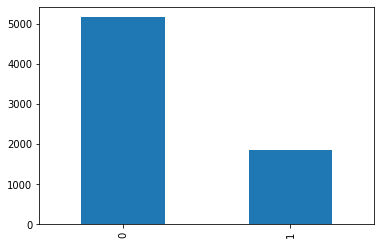

In [ ]:
# Churn 컬럼에 대한 Bar 차트 확인
# 이탈(1)가 이탈않음(0)에 비해 1/3 수준임 : 불균형

df['Churn'].value_counts().plot(kind='bar')

#### SeniorCitizen 컬럼

In [ ]:
# SeniorCitizen 컬럼은 0, 1 되어 있으므로 분포 확인
df['SeniorCitizen'].value_counts()

0.0    5885
1.0    1142
Name: SeniorCitizen, dtype: int64

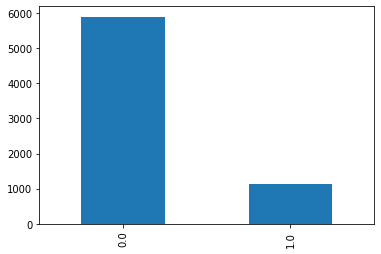

In [ ]:
# SeniorCitizen 컬럼에 대한 Bar 차트 확인
# 이탈(1)가 이탈않음(0)에 비해 1/5 수준임 : 불균형

df['SeniorCitizen'].value_counts().plot(kind='bar')

##### <font color=blue> **[문제] 불균형 심한 'SeniorCitizen' 컬럼을 삭제하세요.** </font>

In [83]:
# DataFrame drop() 함수 활용
# 대상 컬럼 : 'SeniorCitizen'  
# axis 와 inplace 옵션 사용

df.drop('SeniorCitizen', axis=1, inplace=True)


In [84]:
# SeniorCitizen 삭제 확인
df.info() # columns의 개수가 17개로 줄어들었다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 1 to 7041
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


####  
### Histgram

In [85]:
# seaborn 라이브러리 임포트
# 앞에 !가 있으면 리눅스 명령어
#!pip install seaborn

import seaborn as sns

#### tenure 컬럼

<Axes: xlabel='tenure', ylabel='Count'>

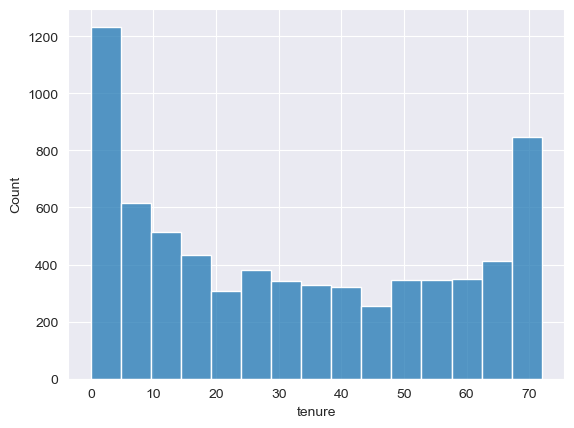

In [86]:
# tenure (서비스 사용기간)에 대한 히스토그램
# 처음에 많이 사용하고 , 70개월 사용하는 충성고객도 있다.
# histlot => Y 값은 있어도 되지만 여기서는 필요 없음
sns.histplot(data=df, x='tenure')

<Axes: xlabel='tenure', ylabel='Count'>

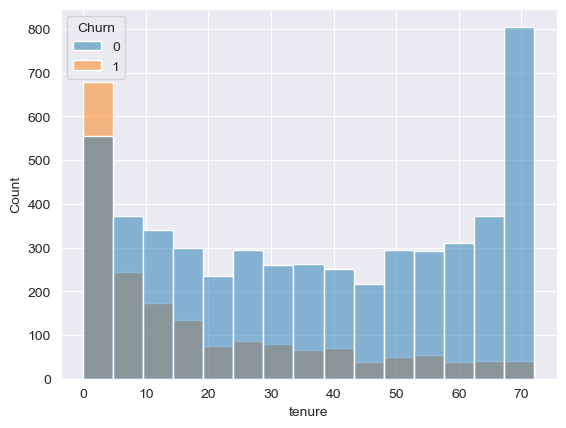

In [89]:
# tenure (서비스 사용기간) 대한 히스토그램을 Churn 으로 구분
# 히스토그램으로 Churn 구분하니 겹쳐서 보기 어렵다.

sns.histplot(data=df, x='tenure', hue='Churn')

<Axes: xlabel='tenure', ylabel='Density'>

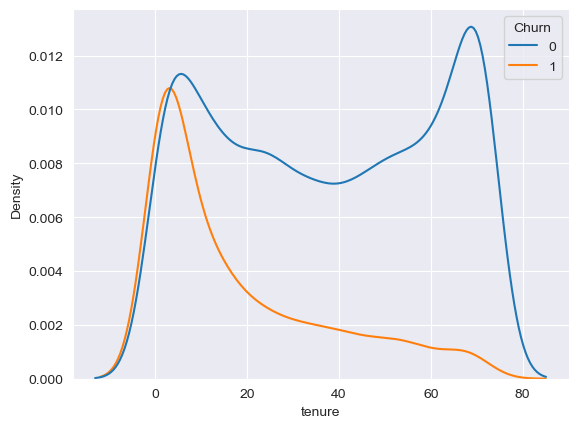

In [94]:
# kdeplot : 히스토그램을 곡선으로 그려보자
# 처음엔 서비스 가입도 많이 하고 이탈도 많이 하는것으로 보이고
# 오래동안 서비스를 사용할수록 이탈이 적으며, 70개월 이상 충성고객이 많이 있음을 알수 있다.

sns.kdeplot(data=df, x='tenure', hue='Churn')
# sns.kdeplot(data=df, x='TotalCharges', hue='Churn')

#### TotalCharges 컬럼

<Axes: xlabel='TotalCharges', ylabel='Count'>

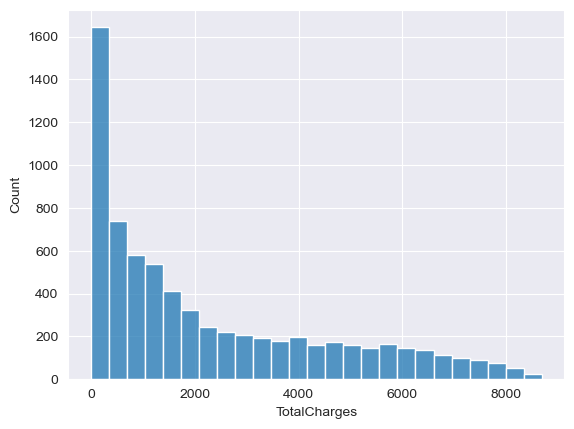

In [93]:
# TotalCharges (서비스 총요금)에 대한 히스토그램
# 처음에 많이 사용하고 금액이 커질수록 사용자수가 줄어든다

sns.histplot(data=df, x='TotalCharges')

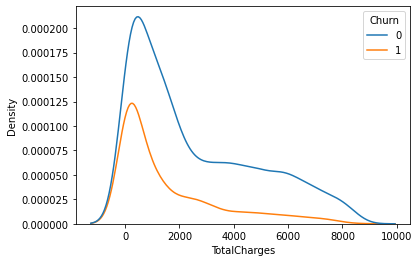

In [ ]:
# kdeplot : 히스토그램을 곡선으로 그려보자
# 최근 가입자가 이탈하기 쉽다.
# MonthlyCharges(서비스 총요금)이 클수록 이탈하기 쉽다.

sns.kdeplot(data=df, x='TotalCharges', hue='Churn')

####  
### Countplot

<Axes: xlabel='MultipleLines', ylabel='count'>

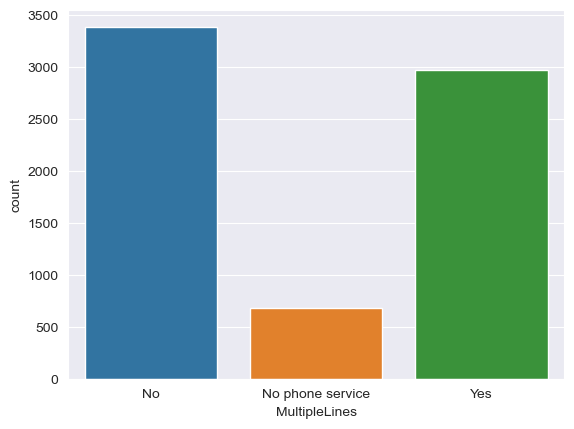

In [96]:
# MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다.
# sns.countplot(data=df, x='MultipleLines',  hue='Churn')
sns.countplot(data=df, x='MultipleLines', )

####  
### heatmap

In [97]:
# 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인해 보자 .corr()
df[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247630,0.826172
MonthlyCharges,0.247630,1.000000,0.651049
TotalCharges,0.826172,0.651049,1.000000


<Axes: >

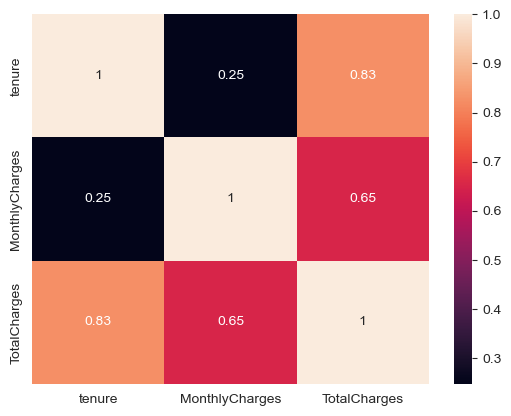

In [100]:
# tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 heatmap으로 그려보자
# tenure(서비스 사용기간)과 TotalCharges(서비스 총요금)간의 깊은 상관관계가 있어 보인다.

sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges',]].corr(), annot=True)

####  
### boxplot

<Axes: xlabel='Churn', ylabel='TotalCharges'>

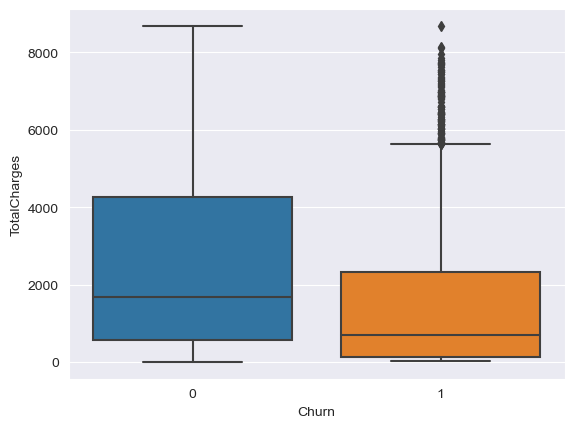

In [101]:
# 이탈하는 고객이 이탈하지 않는 고객에 비해 총사용금액이 낮으며, Outlier 보인다.
sns.boxplot(data=df, x='Churn', y='TotalCharges')

#  
# 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [103]:
# index=False 주어야 기존 인덱스 값이 저장되지 않음
df.to_csv('data_v1_save.csv', index=False)

In [104]:
pd.read_csv('data_v1_save.csv').head()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,34,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
1,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
2,Male,No,No,45,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,Female,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
4,Female,No,No,8,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


##  
## 배운 내용 정리
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot 
5. 결과 저장하기
 + to_csv()